![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
IMK-IFU KIT Campus Alpin, Sept. 4 - 13 2019, Garmisch-Partenkirchen, Germany.

---

# Data formats 

... an overview of formats that you might come across and when you might use them. 

## Text-based formats
### Tabular text files: csv, tsv, txt

**What to use:** `pandas` (`pd.read_csv()`)

I'd say, in general the most common file format you might encounter. Also, potentially messy since there is no true schema to it (there are actually many). Luckily, pandas has a pretty great `read_csv()` Function that can handle pretty much any variant you might come across (it's actually so versatile that it has about 250 arguments you can specify!!!).

We cannot possbibly cover all aspects, but some of the more common arguments (at least for me) are:
- specifying the seperator (`sep=`)
- split at any kind of whitespace (`delim_whitespace=True`)
- specifying if there's no header (`header=None`)
- giving column names (`names=["Col1","Col2",...]`; if the file has no colnames yet don't forget to specify `header=None`, too)
- use a columns to set the index (`index_col='myIndexCol'`)
- specify which value should be considered missing/ NaN (`na_values=[-9999, 'na', 'none']`) - this can also be done per-column if you specify a dictionary for your columns with the individual NaN-values to filter
- skipping rows (`skiprows=5`)
- convert date columns to an actual date type during import (`parse_dates=True` or `parse_dates=['DateCol1', 'DateCol2']`) - you can also specify a custom data/time parser function if pandas has trouble detecting the correct format

**Tip:** Since formats are so variable it's often a good idea to peak into the first 10 to 100 lines of a file. A fast and easy way to do this in Jupyter is to issue a bash command inline like so:

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

A small example:

### XML

**What to use:** `cElementTree` (or: `lxml`)

The Extensible Markup Language (XML) usually encodes a document or data structure. It is organized tree-like thus supports a hierarchy. Usually a schema is defined that defines what a given XML document can contain (like a database schema). The basic building blocks to encapsule data are elements and attributes. You can have elements that enclose text (`<myelement>text</myelement>`) or elements without text (`<myelement />`). Often, you also have attributes in an element (`<myelement attribute1="A" another_attr="2"/>`).

A nested XML structure might look like this:

```
<person sex="female">
  <firstname>Anna</firstname>
  <lastname>Smith</lastname>
</person>
```
As a small example with data we will use in the Deep Learning lessons. Let's read one of the image description XML files that exist for each image of the ImageCLEF 2013 plant classification challenge

In [3]:
from pathlib import Path
import xml.etree.cElementTree as ET

# get xml files in dir and return first one from generator using next()
file_path = next(Path('../data/imageclef_2013_sample').glob('*.xml'))
file_path

PosixPath('../data/imageclef_2013_sample/3.xml')

Again, if we do not have a clear picture what is actually in the file it's a good idea to print it.


In [4]:
# Note that we can use python variables in a bash command with the curly brackets !!!
! cat {file_path}

<?xml version="1.0" encoding="UTF-8"?>
<Image>
  <FileName>3.jpg</FileName>
  <IndividualPlantId>742</IndividualPlantId>
  <Date>07/07/10</Date>
  <Locality>France - Montpellier</Locality>
  <GPSLocality>
    <Longitude>3.876716</Longitude>
    <Latitude>43.610769</Latitude>
  </GPSLocality>
  <Author>Jean-Francois Molino</Author>
  <Organization>Tela Botanica</Organization>
  <Type>SheetAsBackground</Type>
  <Content>Leaf</Content>
  <ClassId>Rhamnus alaternus</ClassId>
  <Taxon>
    <Regnum>Plantae</Regnum>
    <Class>Equisetopsida C. Agardh</Class>
    <Subclass>Magnoliidae Novák ex Takht.</Subclass>
    <Superorder>Rosanae Takht.</Superorder>
    <Order>Rosales Bercht. &amp; J. Presl</Order>
    <Family>Rhamnaceae Juss.</Family>
    <Genus>Rhamnus L.</Genus>
    <Species>Rhamnus alaternus L.</Species>
  </Taxon>
  <VernacularNames>Italian buckthorn</VernacularNames>
  <Year>ImageCLEF2011</Year>
  <IndividualPlantId2012>201</IndividualPlantId2012>
  <ImageID2012>4411.jpg</ImageID201

As we can see this schema apparently does not use any attributes, just elements...

In [5]:
# parse the entire file
xml = ET.parse(file_path)

# get the document root element
root = xml.getroot()

print(root)

<Element 'Image' at 0x7f0fe9b67638>


We cannot do a full XML tutorial here, but you can either iterate through elements or you can search for a specific one.
The following code searches for the first occurance of the subelement Family and return the text enclosed by the element
(if it had an attribute we could query it using `.attrib['attributeName']`).

In [6]:
root.find('./Taxon/Family').text

'Rhamnaceae Juss.'



**Note:** 
- Using the package `xmltodict` (not shown) we can also read in a XML file and convert it to a nested python dictionary. We then could pass it on and convert it into a JSON structure (which basically is a nested dictionary).
- If our file had many entries of *Image*, one would iterate over them like this:

```python
for child in root:
    print(child.tag, child.attrib, child.text)
```
- More on using ElementTree [here](https://docs.python.org/3/library/xml.etree.elementtree.html).

### JSON

JavaScript Object Notation (JSON) was inspired by a subset of the JavaScript programming language dealing with object literal syntax but nowadays has its own standard. JSON supports primitive types, like strings and numbers, as well as nested lists and objects.

An example looks like this:
```JSON
{
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "sky diving", "singing"],
    "age": 35,
    "children": [
        {
            "firstName": "Alice",
            "age": 6
        },
        {
            "firstName": "Bob",
            "age": 8
        }
    ]
}
```

You can read in a JSON file like this:

In [7]:
import json

# reading a json file
with open("../data/other/simple_example.json", "r") as read_file:
    data = json.load(read_file)

print(data)
print('\nbetter to pretty-print:')
print(json.dumps(data, indent=4))

{'quiz': {'sport': {'q1': {'question': 'Which one is correct team name in NBA?', 'options': ['New York Bulls', 'Los Angeles Kings', 'Golden State Warriros', 'Huston Rocket'], 'answer': 'Huston Rocket'}}, 'maths': {'q1': {'question': '5 + 7 = ?', 'options': ['10', '11', '12', '13'], 'answer': '12'}, 'q2': {'question': '12 - 8 = ?', 'options': ['1', '2', '3', '4'], 'answer': '4'}}}}

better to pretty-print:
{
    "quiz": {
        "sport": {
            "q1": {
                "question": "Which one is correct team name in NBA?",
                "options": [
                    "New York Bulls",
                    "Los Angeles Kings",
                    "Golden State Warriros",
                    "Huston Rocket"
                ],
                "answer": "Huston Rocket"
            }
        },
        "maths": {
            "q1": {
                "question": "5 + 7 = ?",
                "options": [
                    "10",
                    "11",
                    "12",
    

Most often, you'd probably pull JSON files from the web. Here is a small example how you do this with `requests`.

In [8]:
import urllib.request
import json 
with urllib.request.urlopen("http://maps.googleapis.com/maps/api/geocode/json?address=google") as url:
    data = json.loads(url.read().decode())
    print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


Now, this request actually yields an error since we did not specify an API token to use this google API(which is encoded in JSON as well). Moving on...

If you already have a JSON structure in a string (because you fulled it in from the web etc.):

In [9]:
import json

json_string = """
{
    "researcher": {
        "name": "Ford Prefect",
        "species": "Betelgeusian",
        "relatives": [
            {
                "name": "Zaphod Beeblebrox",
                "species": "Betelgeusian"
            }
        ]
    }
}
"""
data = json.loads(json_string)
data

{'researcher': {'name': 'Ford Prefect',
  'species': 'Betelgeusian',
  'relatives': [{'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}]}}

## Binary formats
### Excel 🤨

Ok, **you really should be using csv files instead**. However, if you need to import Excel files pandas can do it (if you also install `xlrd`).

In [13]:
import pandas as pd 
df = pd.read_excel("../data/other/NO2_2017.xlsx", sheet_name='Seite 1')
print(df.head())

  LfU Bayern LÜB Stickstoffdioxid NO2 Stundenmittelwerte µg/m³, Zeitangabe MEZ  \
0                                          Zeitpunkt                             
1                                   01.01.2017 01:00                             
2                                   01.01.2017 02:00                             
3                                   01.01.2017 03:00                             
4                                   01.01.2017 04:00                             

           Unnamed: 1              Unnamed: 2                Unnamed: 3  \
0  Andechs/Rothenfeld  Ansbach/Residenzstraße  Aschaffenburg/Bussardweg   
1                  11                      26                        37   
2                  11                      26                        38   
3                   8                      27                        38   
4                   6                      27                        39   

               Unnamed: 4           Unnamed: 5          

Ok, this was not quite right. We should skip one line. Also, we want to parse the "Zeitpunkt" datetime column. Since this is a non-standard format according to pandas we will have to define our own parser.

However this does not work since some mad man/ woman has actually encoded the time 24:00 to be valid. We'd have to manually substract one hour from all datetime strings first for this to work... We would do this bis splitting the datetime column into a date and time part, then process the time and combine them again. We leave this for another day.

In [22]:
# define custom datetime parser
my_parser = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M')

# read and skip first row
#df = pd.read_excel("../data/other/NO2_2017.xlsx", sheet_name='Seite 1', skiprows=1, parse_dates=['Zeitpunkt'], date_parser=my_parser) #, index_col="Zeitpunkt")
#print(df.head())

# does not work since the datetime column is encoded wrong (24:00)

### Pickled files: pkl

Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object.

You should only use this in a local machine as the format is not guaranteed to de-serialize on other machines in the same way. Also, this can pose a security risk.

In [25]:
import pickle

dogs_dict = { 'Ozzy': 3, 'Filou': 8, 'Luna': 5, 
              'Skippy': 10, 'Barco': 12, 
              'Balou': 9, 'Laika': 16 }

# now we write it as a binary file with pickle. first open a file in binary 
# write mode and then dump the pickled data

with open('dogs.pkl','wb') as fout:
    pickle.dump(dogs_dict, fout)

# we can read it back in with
with open('dogs.pkl','rb') as fin:
    new_dict = pickle.load(fin)

# this checks id identical
assert dogs_dict == new_dict

### Netcdf3/4

Simply use `xarray`. There are other netcdf libs, but since xarray is so elegant I see no point using those anymore.

In [26]:
import xarray as xr

ds = xr.open_dataset('../data/other/NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

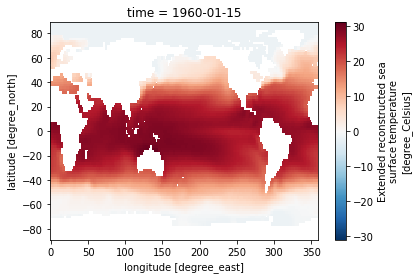

In [29]:
ds.sst.isel(time=0).plot();

### sql

I'd recommend to use SQLAlchemy if you work with with SQL databases. It's a nice ORM and is very common in python. We are not going to use SQL data in the course so I'll skip this.

## Geographic data
### Shapefiles

It's quite easy to read shapefiles in Python. There are low-level libraries like `fiona`, but it's easiest to just use `geopandas`. You'll see an example in the geodata notebook.

### Geotiffs

For geotiffs you can use `rasterio` that's built on GDAL. Again, you can also use xarray which utilizes rasterio if it's installed.

## Other formats
### parquet

Another useful format is parquet. From their homepage:

>Apache Arrow is a cross-language development platform for in-memory data. It specifies a standardized language-independent columnar memory format for flat and hierarchical data, organized for efficient analytic operations on modern hardware.

Again, pandas can read it. We don;t use it in the course but it's very common in big data and well worth a look.

### feather

A new format introduced for easy in-memory exchange between different software. 